In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

from sklearn.decomposition import PCA

from ShapeDescs import *
from utils import plot_sample_cluster, cluster_sizes, plot_clustering
from ModelSelection import select_cpf, select_kmean, select_models

c:\Users\eakew\OneDrive - Trinity College Dublin\Documents\Research Work\ShapeAnalysisForMgPowder\ea_analysis\AutoEncoder\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#get the datapath
datapath = os.path.join(os.path.join(os.getcwd(), '../../'), '316L-reused/316L-reused/Sample Particle Images')
# datapath

In [3]:
len(os.listdir(datapath))

1000

The implementations of shape descriptors are in the py scrpit `ShapeDescs.py`. The descriptors implemented are:
- Hu Moments (`HuMoments`),
- Zernike Moments (`ZernikeMoments`),
- SIFT (`SIFT`),
- Fourier Descriptor (`FourierDescriptor`),
- Elliptical Fourier Descriptor (`EllipticFourierDesc`),
- Shape Context (`ShapeContext`), and
- Centroid Distance Function (`CentroidDist`).

## Usage
The usage of the implemented shape descriptors are quite similar. 
- First create the shape descriptor object. `DescObj = <DescriptorClass>(datapath, ext)`. Aside `datapath` and `ext`, which are the path to the directory where the dataset is stored and the image file extension of the shape dataset, some of the shape descriptors have other optional parameter. Use `?<DescriptorClass>` to check for the optional parameter.
- Next, compute the shape descriptor features using the method `get_descs()`.
- The computed shape descriptors are stored in the attribute `descs`.

Now any multivariate clustering method can be applied to the features obtained.

Using Hu Moments to illustrate:

In [4]:
DescObj = HuMoments(datapath = datapath, ext = '.bmp')
DescObj.get_descs()
DescObj.descs

array([[ 6.24526522e-04,  2.69720479e-10,  7.48412799e-15, ...,
        -4.99856920e-34,  4.05388741e-23,  1.28408040e-34],
       [ 6.26919916e-04,  3.19556313e-09,  3.39368903e-14, ...,
         4.21086748e-31,  6.49377941e-21,  2.75801091e-31],
       [ 6.25066850e-04,  1.10399408e-09,  2.90350023e-14, ...,
         1.07690330e-32,  5.05122501e-22, -1.29517543e-32],
       ...,
       [ 6.25414849e-04,  1.41922663e-09,  1.05832798e-13, ...,
         2.62679147e-31,  2.85612287e-21,  1.41419825e-31],
       [ 6.26723918e-04,  2.79399865e-10,  7.15371663e-13, ...,
         4.08524572e-28,  8.55450179e-20,  2.13249330e-28],
       [ 6.24577376e-04,  4.66178537e-10,  3.62775238e-14, ...,
         6.64608586e-33,  2.24541663e-22,  6.98455671e-33]])

In [5]:
DescObj.descs.shape

(1000, 7)

Another Illustration using Zernike Moments

In [7]:
DescObj = ZernikeMoments(datapath = datapath, degree= 3, ext = '.bmp')
DescObj.get_descs()
DescObj.descs

array([[3.18309886e-01, 4.45205587e-15, 2.49130815e-01, 9.55385607e-03,
        8.28693296e-05, 2.10311898e-03],
       [3.18309886e-01, 4.21873854e-15, 2.99018576e-01, 3.00088944e-02,
        6.45968510e-04, 2.82685983e-03],
       [3.18309886e-01, 7.14663243e-16, 2.47252353e-01, 1.94535149e-02,
        2.65509769e-04, 2.93971735e-03],
       ...,
       [3.18309886e-01, 2.32714015e-16, 2.77186586e-01, 2.10061993e-02,
        5.03173248e-04, 5.64729395e-03],
       [3.18309886e-01, 1.09232378e-15, 3.10589906e-01, 7.99773532e-03,
        3.98960121e-03, 1.32830057e-02],
       [3.18309886e-01, 2.94106756e-14, 2.33345466e-01, 1.23934492e-02,
        2.22043302e-04, 3.60574370e-03]])

In [8]:
DescObj.descs.shape

(1000, 6)

How to query for Descriptot Class parameters

In [9]:
?HuMoments

Init signature: HuMoments(datapath, ext='.bmp') -> None
Docstring:     
datapath : string
    path of directory where the image data is stored.
ext : string
    to specify the image file extension of shape dataset. For example; '.jpg', '.png', '.bmp' etc
File:           c:\users\eakew\onedrive - trinity college dublin\documents\research work\shapeanalysisformgpowder\ea_analysis\psa\shapedescs.py
Type:           type
Subclasses:     

In [10]:
?ZernikeMoments

Init signature: ZernikeMoments(datapath, degree=8, ext='.bmp') -> None
Docstring:     
datapath : string
    path of directory where the image data is stored.
degree : integer, optional
    Maximum degree to use (default: 8)
ext : string
    to specify the image file extension of shape dataset. For example; '.jpg', '.png', '.bmp' etc 
File:           c:\users\eakew\onedrive - trinity college dublin\documents\research work\shapeanalysisformgpowder\ea_analysis\psa\shapedescs.py
Type:           type
Subclasses:     

## Multivariate Clustering

I used the popular Kmeans (https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html) and a density based clusteirng algorithm, CPF clustering (https://github.com/tobinjo96/CPFcluster).

To ilustrate usage, I will apply Kmeans and CPF to the features generated by Hu moments.

In [10]:
from sklearn.cluster import KMeans #import Kmeans
from cpf_core import CPFcluster #import CPF

In [11]:
kmeans_hm = KMeans(n_clusters = 3, n_init= 'auto')
kmeans_hm.fit(DescObj.descs)
# kmeans_hm.labels_

KMeans(n_clusters=3)

### Use custom function `cluster_sizes(<data_labels>)` to calculate cluster distribution.

In [11]:
?cluster_sizes

Signature: cluster_sizes(labels, prop=False)
Docstring: <no docstring>
File:      c:\users\eakew\onedrive - trinity college dublin\documents\research work\shapeanalysisformgpowder\ea_analysis\psa\utils.py
Type:      function

In [13]:
cluster_sizes(kmeans_hm.labels_)

[644, 22, 334]

In [14]:
np.unique(kmeans_hm.labels_)

array([0, 1, 2])

### use custom function `plot_sample_cluster(...)` to plot random samples from n-th cluster.

In [12]:
?plot_sample_cluster

Signature: plot_sample_cluster(datapath, labels, n, n_plots=(5, 5), ext='.bmp')
Docstring: <no docstring>
File:      c:\users\eakew\onedrive - trinity college dublin\documents\research work\shapeanalysisformgpowder\ea_analysis\psa\utils.py
Type:      function

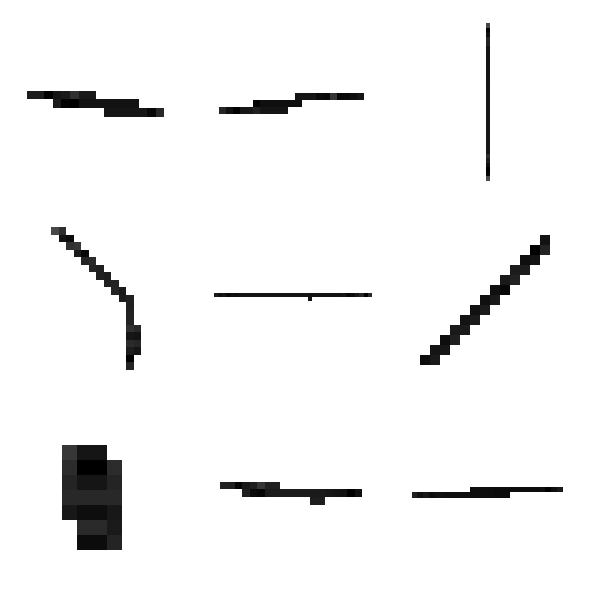

In [16]:
plot_sample_cluster(datapath, kmeans_hm.labels_, 1, (3,3))

### Use custom function `plot_clustering(...)` to visualize all clusters (projected to 2 dimensions)

In [13]:
?plot_clustering

Signature:
plot_clustering(
    X,
    labels,
    method='pca',
    print_score='db',
    s=1,
    alpha=0.5,
    plt_fig=None,
    random_state=42,
    n_neighbors=15,
    min_dist=0.1,
)
Docstring:
Visualize clustering using PCA or UMAP.

Parameters:
- X: array-like, feature matrix
- labels: array-like, clustering labels
- method: 'pca' or 'umap' for dimensionality reduction
- print_score: 'db' or 'ch' to print clustering evaluation metric
- s: point size in scatter plot
- alpha: transparency
- plt_fig: optional matplotlib axis to plot into
- random_state: random seed for UMAP
- n_neighbors: UMAP parameter
- min_dist: UMAP parameter
File:      c:\users\eakew\onedrive - trinity college dublin\documents\research work\shapeanalysisformgpowder\ea_analysis\psa\utils.py
Type:      function

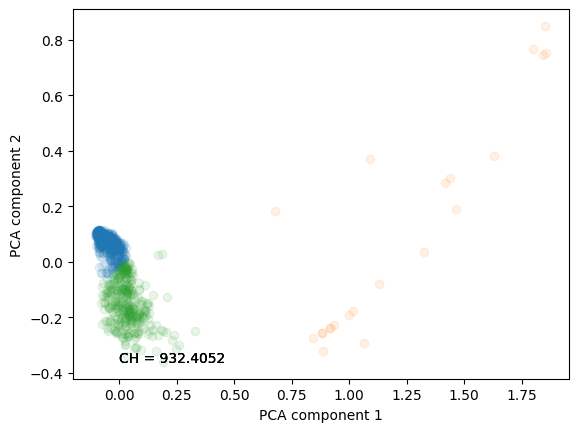

In [ ]:
plot_clustering(DescObj.descs, kmeans_hm.labels_, print_score='ch')

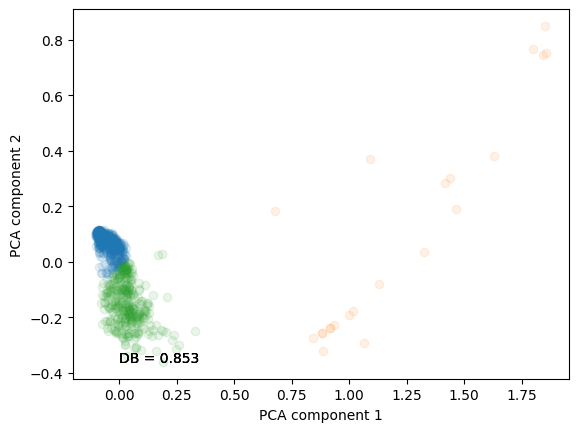

In [ ]:
plot_clustering(DescObj.descs, kmeans_hm.labels_, print_score='db')

## CPF.

In [32]:
cpf_hu = CPFcluster(k = 32, rho = 0.5, n_jobs= 10) #set k to around sqrt(sample size)
cpf_hu.fit(DescObj.descs)
cpf_hu.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  2,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0

In [33]:
cluster_sizes(cpf_hu.labels_)

[1, 977, 20, 2]

In [34]:
np.unique(cpf_hu.labels_)

array([-1,  0,  1,  2])

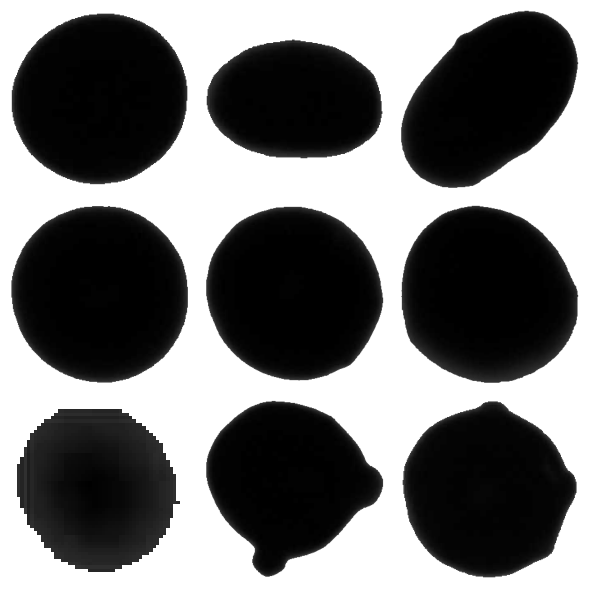

In [35]:
plot_sample_cluster(datapath, cpf_hu.labels_, 0, (3,3))

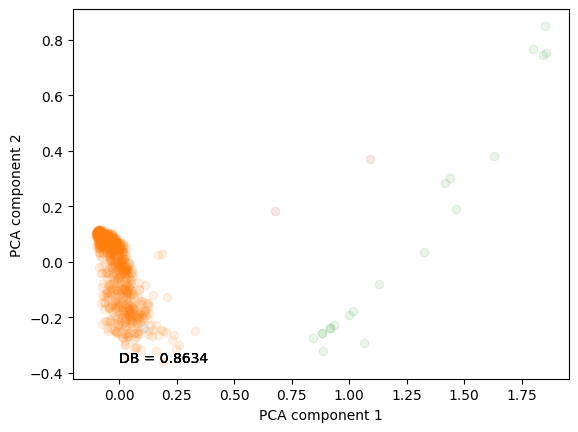

In [24]:
plot_clustering(DescObj.descs, cpf_hu.labels_)

## Grid search for parameter selection using `select_models(...)`

In [41]:
opt_par = select_models(DescObj.descs, 'hu', metric= 'ch')

100%|██████████| 4/4 [00:03<00:00,  1.15it/s]


In [42]:
opt_par

(3, 28, 0.1)

The result is interpreted as follow. Optimum k for kmeans is 3. Optimum k for CPF is 28, and optimum rho for CPF is 0.1.
The function saves the best clusterings in folders `cpf` and `kmeans` for cpf and kmeans clustering respectively. This labels can the be imported using `np.load(...)` as illustrated below for furthe analysis.

In [43]:
cpf_labels = np.load('cpf/hu_ch-labels.npy')
cpf_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  2,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0

In [44]:
cluster_sizes(cpf_labels)

[1, 977, 20, 2]

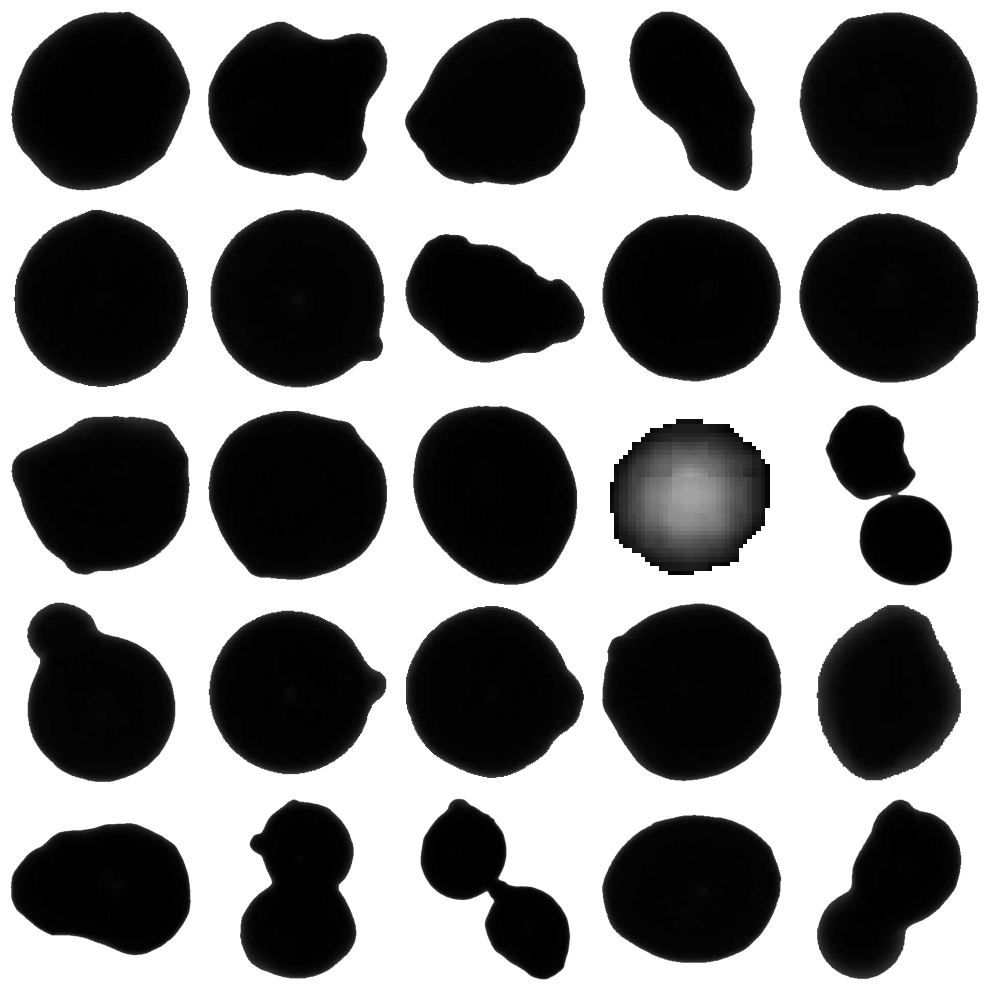

In [45]:
plot_sample_cluster(datapath, cpf_labels, 0)

c:\Users\eakew\OneDrive - Trinity College Dublin\Documents\Research Work\ShapeAnalysisForMgPowder\ea_analysis\scripts\utils.py:20: UserWarning: The cluster has only 20 samples.
  warnings.warn(f"The cluster has only {len(clstr)} samples.")


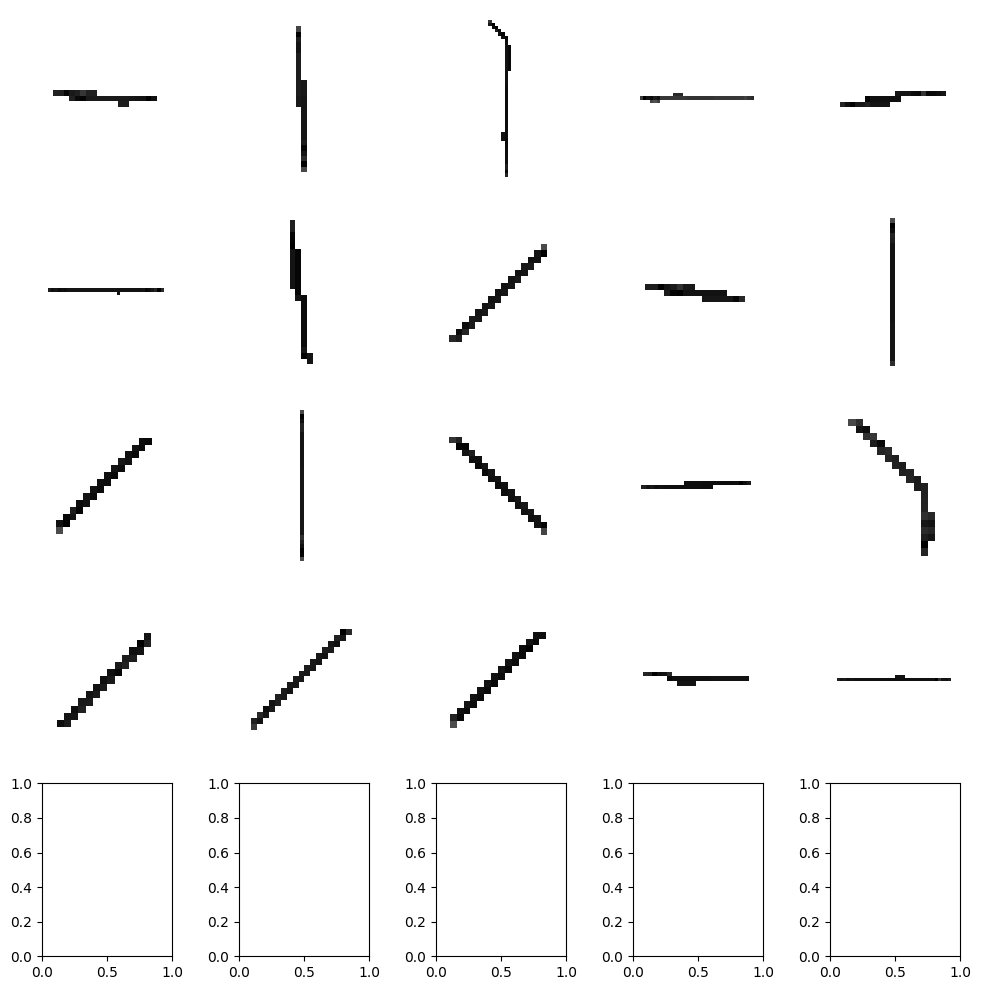

In [46]:
plot_sample_cluster(datapath, cpf_labels, 1)